In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
data = pd.read_csv('qsar_fish_toxicity.csv')
data.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,3.260,0.829,1.676,0.0,1,1.453,3.770
1,2.189,0.580,0.863,0.0,0,1.348,3.115
2,2.125,0.638,0.831,0.0,0,1.348,3.531
3,3.027,0.331,1.472,1.0,0,1.807,3.510
4,2.094,0.827,0.860,0.0,0,1.886,5.390


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CIC0                906 non-null    float64
 1   SM1_Dz(Z)           906 non-null    float64
 2   GATS1i              906 non-null    float64
 3   NdsCH               907 non-null    float64
 4   NdssC               908 non-null    int64  
 5   MLOGP               905 non-null    float64
 6   LC50 [-LOG(mol/L)]  906 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 49.8 KB


# Remove Null values
## SM1_Dz(Z) : 0 means missing value

In [199]:
colums = ['SM1_Dz(Z)']
data[colums] = data[colums].replace(0,float('NaN'))
# data.info()

In [200]:
data.isna().sum()

CIC0                   2
SM1_Dz(Z)             38
GATS1i                 2
NdsCH                  1
NdssC                  0
MLOGP                  3
LC50 [-LOG(mol/L)]     2
dtype: int64

## Calculating null values

In [201]:
data.skew()

CIC0                  0.045111
SM1_Dz(Z)             0.736832
GATS1i                1.391213
NdsCH                 3.398560
NdssC                 7.489497
MLOGP                -0.038095
LC50 [-LOG(mol/L)]    0.254314
dtype: float64

### Based on unsatisfactory results from the previous method, we decided to use the KNN Imputer to handle null values. Observing the model's performance, we concluded that this approach is more suitable for replacing missing data. The KNN Imputer uses neighboring data points to impute missing values, making it a robust technique that improves accuracy and reliability of our analysis. This choice is expected to enhance our models and lead to meaningful insights and predictions.

### Apply KNNImputer for NUll value removal

In [202]:
# data['CIC0'].fillna(data['CIC0'].mean(),inplace=True)
# data['SM1_Dz(Z)'].fillna(data['SM1_Dz(Z)'].median(),inplace=True)
# data['GATS1i'].fillna(data['GATS1i'].mean(),inplace=True)
# data['NdsCH'].fillna(data['NdsCH'].median(),inplace=True)
# data['MLOGP'].fillna(data['MLOGP'].median(),inplace=True)
# data['LC50 [-LOG(mol/L)]'].fillna(data['LC50 [-LOG(mol/L)]'].mean(),inplace=True)

# Apply K means to missing value treatment
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(data),columns=data.columns)
df_imputed['NdssC'] = df_imputed['NdssC'].astype(int)

print(df_imputed.isnull().sum())

data = df_imputed

CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64


In [203]:
data.isna().sum()

CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64

## Removing Null values Succesfull!

Here we take 2 data set 'data_1' and 'data_2' and applying diffrent outlier method and Analise the data

# Now Removing Outliers from the Data set

### Apply IQR Method

In [204]:
print("The lenght of data before outlier removal: {}".format(len(data)))

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_1 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("The lenght of data After outlier removal: {}".format(len(data_1)))

The lenght of data before outlier removal: 908
The lenght of data After outlier removal: 706


### Apply Z-Score method

In [205]:
print("The lenght of data before outlier removal: {}".format(len(data)))

from scipy import stats

z_score_threshold = 3

z_scores = stats.zscore(data.select_dtypes(include='number'))

outlier_indices = (abs(z_scores) > z_score_threshold).any(axis=1)

data_2 = data[~outlier_indices]

print("The lenght of data After outlier removal: {}".format(len(data_2)))

The lenght of data before outlier removal: 908
The lenght of data After outlier removal: 864


## Visulizing Data_1

<Axes: >

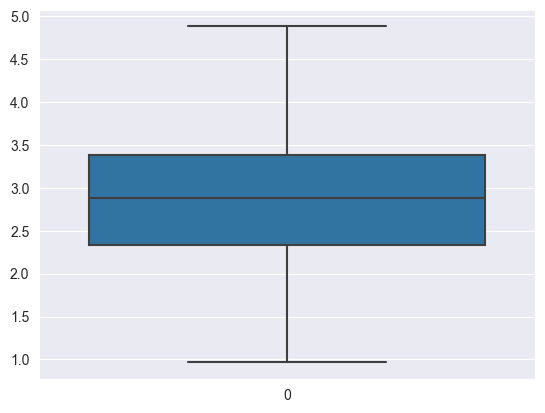

In [206]:
sns.boxplot(data = data_1['CIC0'],orient='v')

<Axes: >

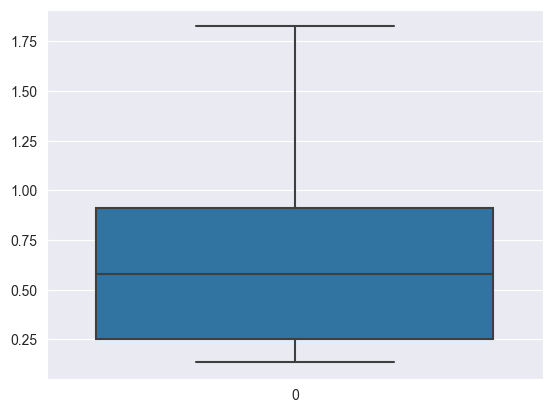

In [207]:
sns.boxplot(data=data_1['SM1_Dz(Z)'],orient='v')

<Axes: >

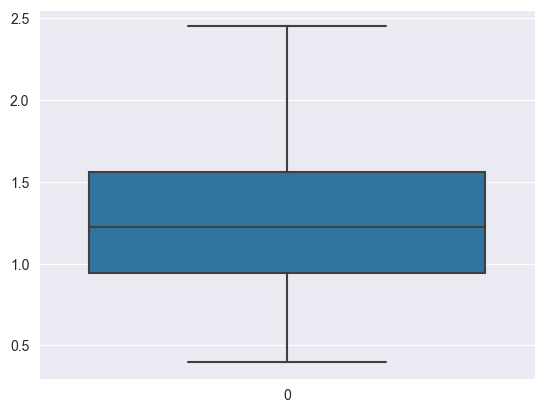

In [208]:
sns.boxplot(data=data_1['GATS1i'],orient='v')

<Axes: >

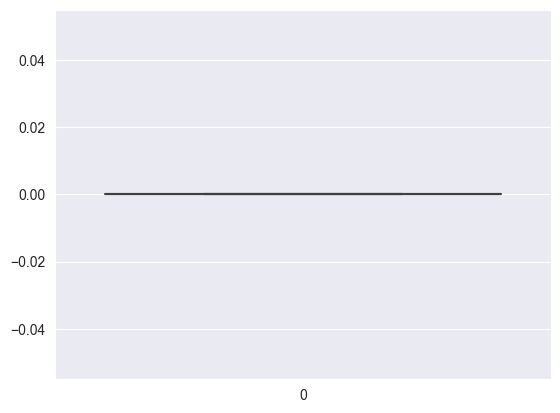

In [209]:
sns.boxplot(data=data_1['NdsCH'],orient='v')

<Axes: >

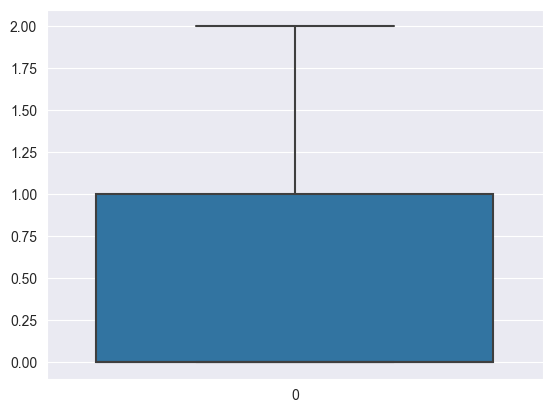

In [210]:
sns.boxplot(data=data_1['NdssC'],orient='v')

<Axes: >

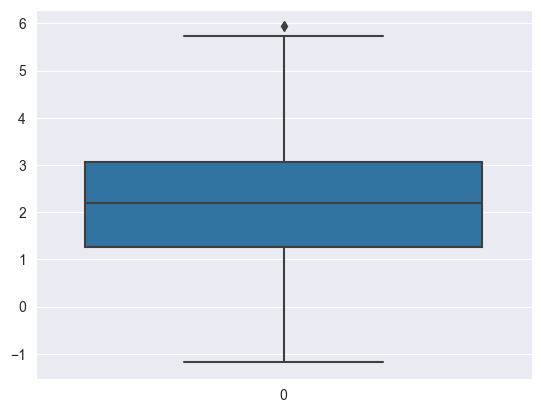

In [211]:
sns.boxplot(data=data_1['MLOGP'],orient='v')

<Axes: >

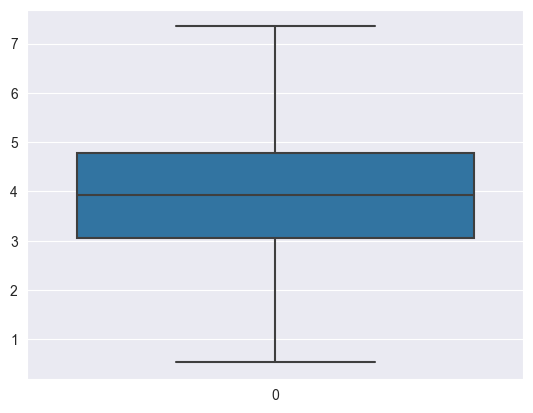

In [212]:
sns.boxplot(data=data_1['LC50 [-LOG(mol/L)]'],orient='v')

## Visulizing Data_2

<Axes: >

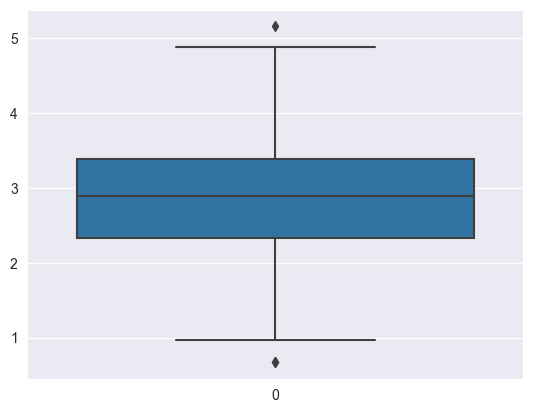

In [213]:
sns.boxplot(data = data_2['CIC0'],orient='v')

<Axes: >

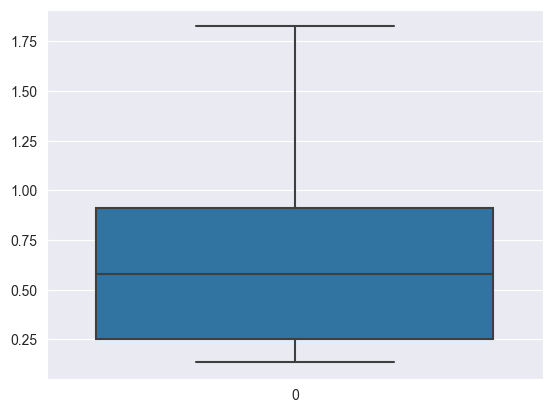

In [214]:
sns.boxplot(data=data_1['SM1_Dz(Z)'],orient='v')

<Axes: >

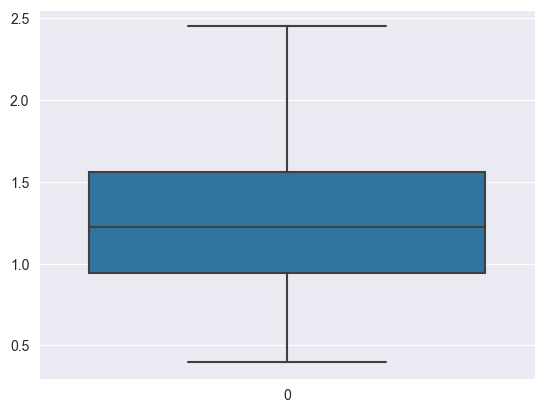

In [215]:
sns.boxplot(data=data_1['GATS1i'],orient='v')

<Axes: >

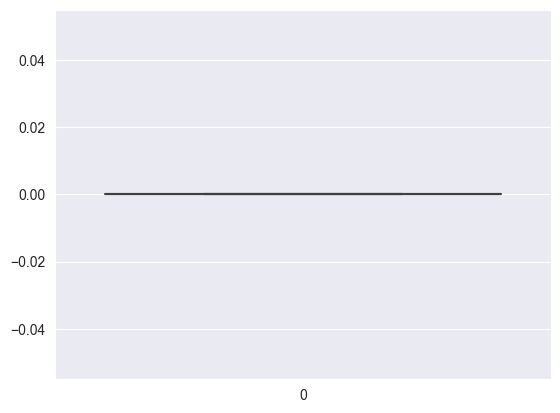

In [216]:
sns.boxplot(data=data_1['NdsCH'],orient='v')

<Axes: >

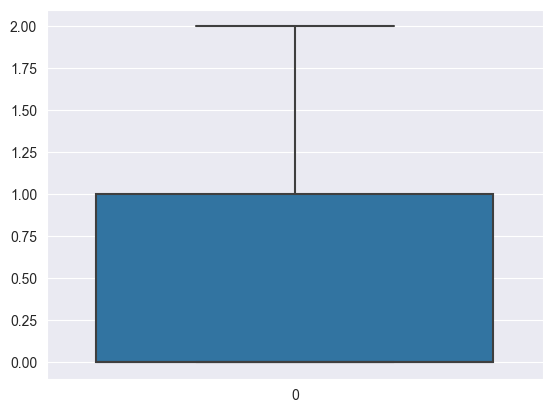

In [217]:
sns.boxplot(data=data_1['NdssC'],orient='v')

<Axes: >

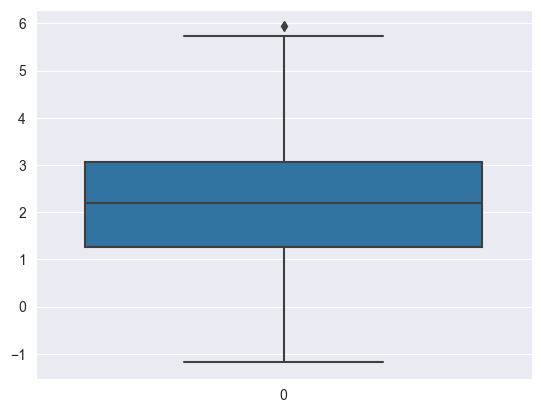

In [218]:
sns.boxplot(data=data_1['MLOGP'],orient='v')

<Axes: >

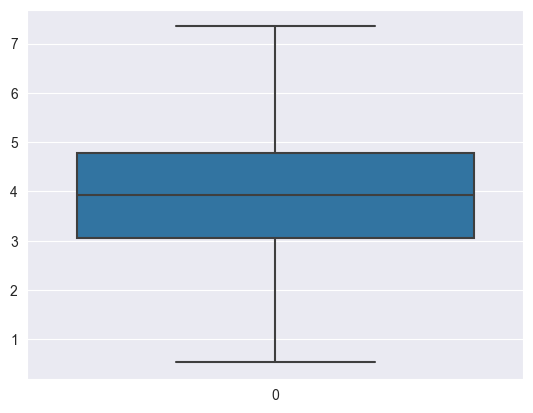

In [219]:
sns.boxplot(data=data_1['LC50 [-LOG(mol/L)]'],orient='v')

### After visualizing both data box plots, we conclude that we should select data_2 for further analysis. This decision is based on the observation that data_2 exhibits less data loss, which leads to more accurate results in its box plot compared to data_1.

In [220]:
# df=data_2

## After conducting further analysis, we observed that selecting data_2 as the primary dataset led to very poor predictions from the model. This was likely due to the fact that data_2 had fewer outlier removals, which negatively impacted the model's performance. As a result, we have made the decision to use data_1 for the further analysis and modeling process. Data_1's outlier removal process appeared to yield better results, making it a more suitable choice for our predictive analysis.

In [221]:
df = data_1

In [222]:
df.isna().sum()

CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64

# Now Observe the data

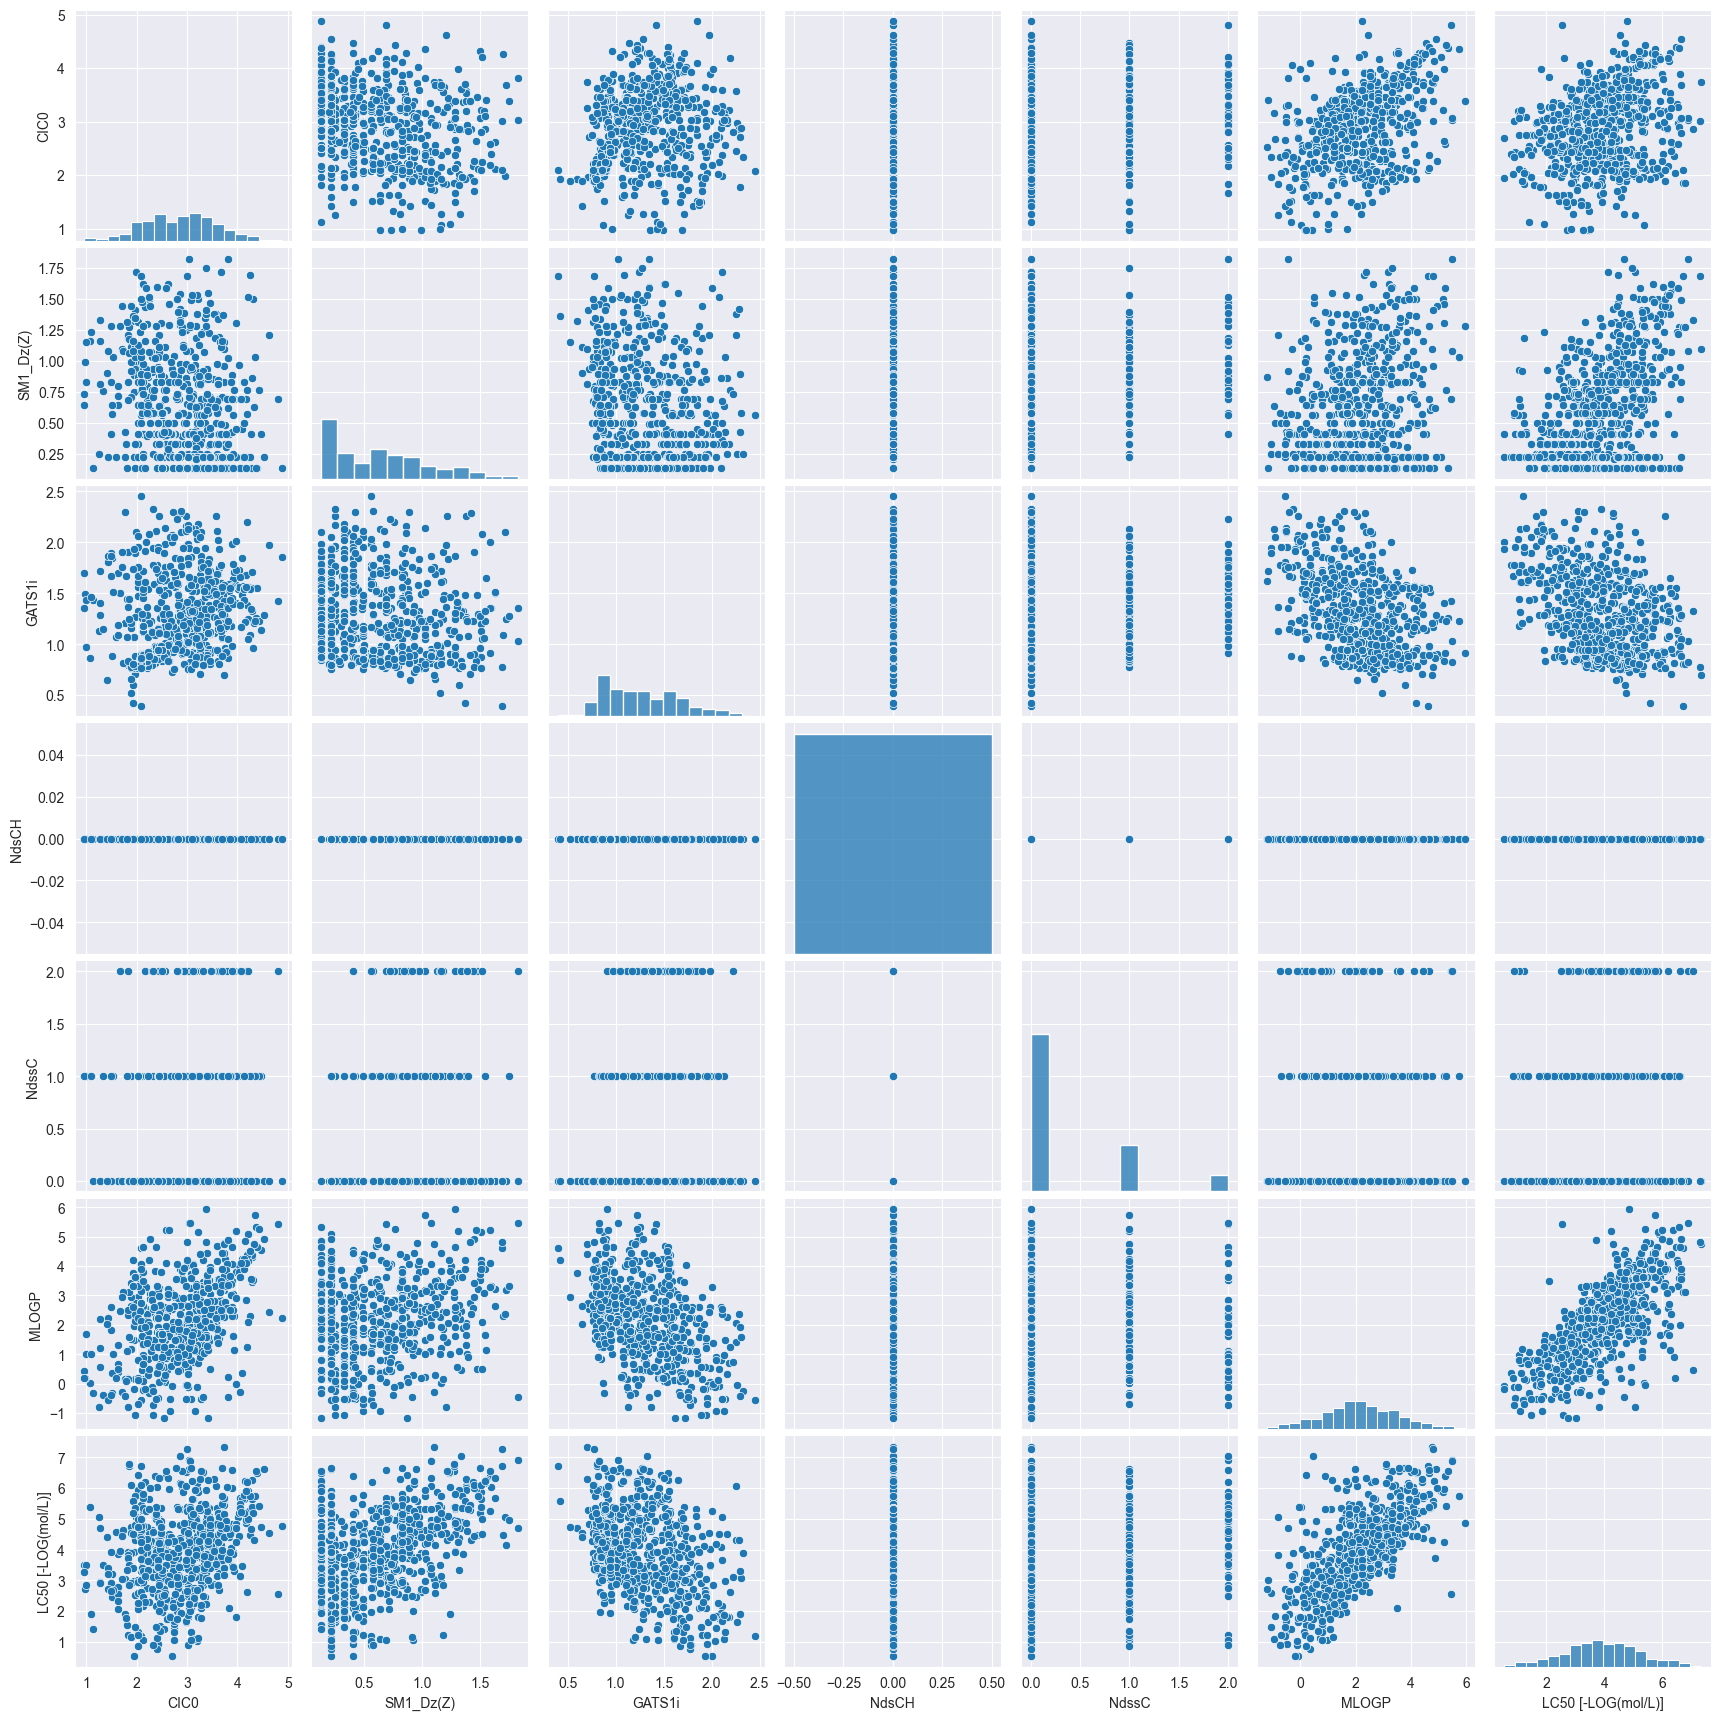

In [223]:
sns.pairplot(df)

<Axes: >

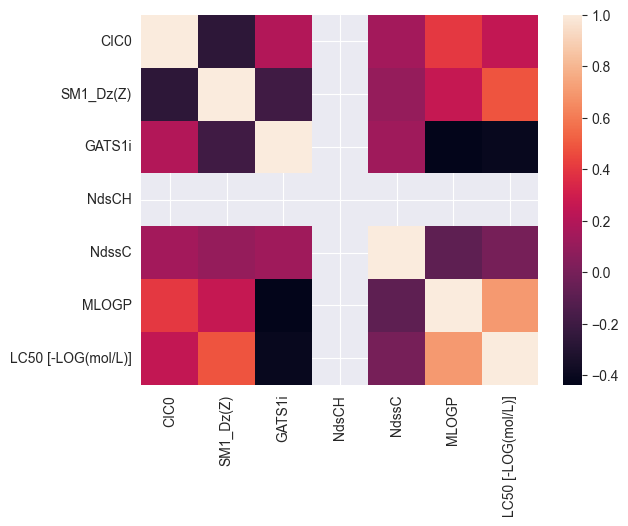

In [224]:
sns.heatmap(df.corr())

## Scale the data

In [225]:
df_1 = df
scaled_df = df_1[['CIC0','SM1_Dz(Z)','NdssC','GATS1i','MLOGP','LC50 [-LOG(mol/L)]']]

for i in scaled_df.columns:
    scaled_df[i] = (scaled_df[i] - scaled_df[i].mean())/scaled_df[i].std()

C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_6364\2326602845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[i] = (scaled_df[i] - scaled_df[i].mean())/scaled_df[i].std()


## Factor Analysis

In [226]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis().fit(scaled_df)

factors_df = pd.DataFrame(fa.components_,columns=scaled_df.columns)
print(factors_df)

       CIC0  SM1_Dz(Z)     NdssC    GATS1i     MLOGP  LC50 [-LOG(mol/L)]
0  0.253508   0.432489 -0.038289 -0.494589  0.771949            0.789845
1  0.629777  -0.384291  0.123215  0.298751  0.157311           -0.007147
2  0.025034   0.276920  0.381933  0.226561 -0.077668            0.074367
3  0.000000   0.000000 -0.000000  0.000000  0.000000            0.000000
4 -0.000000   0.000000  0.000000  0.000000  0.000000           -0.000000
5  0.000000   0.000000 -0.000000 -0.000000 -0.000000           -0.000000


### After observing the pair plot and Factor Analysis, we have come to the conclusion that we should build three different models for prediction. In the first model, we will use 'MLOGP','SM1_Dz(Z)', 'CIC0','GATS1i', as the independent variables (X). In the second model, we will include 'CIC0', 'SM1_Dz(Z)' and 'MLOGP' as the independent variables (X). Lastly, in the third model, we will use all six available features as the independent variables (X).

### The decision to create these three models is based on the insights gained from the pair plot, which indicates that different combinations of these features may have varying effects on the prediction task. By testing these three models, we aim to explore how different sets of independent variables influence the accuracy and performance of our predictions.

#### In the first model, we focus on 'MLOGP','SM1_Dz(Z)', 'CIC0','GATS1i', as these two features seem to exhibit a strong relationship with the target variable in the pair plot. This could suggest that they might have a significant impact on the prediction results.

#### For the second model, we add 'CIC0', 'SM1_Dz(Z)' and 'MLOGP' as independent variables. These additional features were chosen because the pair plot suggests they might provide complementary information to enhance prediction accuracy.

#### In the third model, we consider all six available features as independent variables. This comprehensive approach aims to leverage the combined effects of all features and explore the potential for improved prediction performance.

#### By building and comparing the results of these three models, we can better understand the relationships between the features and the target variable, identify significant predictors, and ultimately make more informed decisions in our predictive analysis.

# Model 1
## X parameters CIC0 , SM1_Dz(Z) , GATS1i , MLOGP let as X_C.S.G.M

In [227]:
report = pd.DataFrame(columns=['  X_paremeter   ','     Model         ','   R2_score(%)  '])

In [228]:
X = df[['CIC0','SM1_Dz(Z)','GATS1i','MLOGP']]
y = df['LC50 [-LOG(mol/L)]']

In [229]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

len(X_train),len(X_test)

(564, 142)

## Apply Linear Regression

The R2 score: 64.11923169824898%
The mean_absolute_error: 62.32219279912536%
The mean squared error: 71.44228363460847%


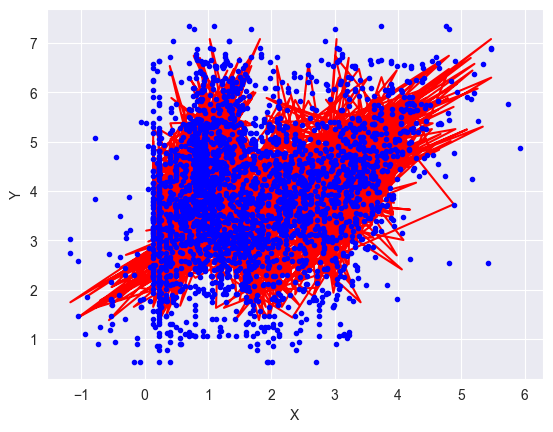

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error


lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc[' '] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP','Linear Regression',r2_score(y_test,y_pred)*100]

plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X , y , "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


## Apply Polynomial Regression
### Degree 2

In [231]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# In Degreee 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['0'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP','Linear Regression degree 2',r2_score(y_test,y_pred)*100]

The R2 score: 62.77057116435185%
The mean_absolute_error: 62.02653096163571%
The mean squared error: 74.127604851233%


### Degree 3

In [232]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# In Degreee 3
poly = PolynomialFeatures(degree=3,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['1'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP','Linear Regression degree 3',r2_score(y_test,y_pred)*100]

The R2 score: 55.04756278015353%
The mean_absolute_error: 69.80511801276408%
The mean squared error: 89.5049053275283%


### Degree 4

In [233]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# In Degreee 4
poly = PolynomialFeatures(degree=4,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['2'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP','Linear Regression degree 4',r2_score(y_test,y_pred)*100]

The R2 score: -257.32736054374845%
The mean_absolute_error: 97.78669020961708%
The mean squared error: 711.4753627259057%


### Apply Ridge

In [234]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

m_r = Ridge()
m_r.fit(X_train,y_train)
y_pred = m_r.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['3'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Ridge ',r2_score(y_test,y_pred)*100]

The R2 score: 64.0389070535853%
The mean_absolute_error: 62.469455299268404%
The mean squared error: 71.60221822682934%


### Apply Lasso

In [235]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

m_p = Lasso()
m_p.fit(X_train,y_train)
y_pred = m_p.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['4'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Lasso ',r2_score(y_test,y_pred)*100]

The R2 score: 13.04706990005653%
The mean_absolute_error: 108.72256285089877%
The mean squared error: 173.13218721565917%


### Apply Decsion Tree

In [236]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['5'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Decision Tree ',r2_score(y_test,y_pred)*100]

The R2 score: 47.470527412039175%
The mean_absolute_error: 72.70981220657278%
The mean squared error: 104.59155858215965%


### Apply Random Forest Regression

In [237]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

R_r = RandomForestRegressor()
R_r.fit(X_train,y_train)
y_pred = R_r.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['6'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Random Forest ',r2_score(y_test,y_pred)*100]

The R2 score: 66.29240557451472%
The mean_absolute_error: 60.73312132111237%
The mean squared error: 67.11527192878829%


### Apply Extra Tree Regression

In [238]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

E_t = ExtraTreeRegressor()
E_t.fit(X_train,y_train)
y_pred = E_t.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['7'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Extra Tree Regression ',r2_score(y_test,y_pred)*100]

The R2 score: 46.179033047330705%
The mean_absolute_error: 74.16284037558685%
The mean squared error: 107.16305610250392%


### Apply AdaBoostRegression

In [239]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Ab = AdaBoostRegressor()
Ab.fit(X_train,y_train)
y_pred = Ab.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['8'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' AdaBoost ',r2_score(y_test,y_pred)*100]

The R2 score: 62.162480616240366%
The mean_absolute_error: 65.26864696780902%
The mean squared error: 75.33837539684546%


### Apply GB Regression

In [240]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Gb = GradientBoostingRegressor()
Gb.fit(X_train,y_train)
y_pred = Gb.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['9'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' GradientBoostingRegressor ',r2_score(y_test,y_pred)*100]

The R2 score: 67.71074894428317%
The mean_absolute_error: 59.26330383510903%
The mean squared error: 64.29120505089709%


### Apply BagginRegressor

In [241]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Br = BaggingRegressor()
Br.fit(X_train,y_train)
y_pred = Br.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['10'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Bagging Regressor ',r2_score(y_test,y_pred)*100]



The R2 score: 62.14933362349024%
The mean_absolute_error: 63.64411362620167%
The mean squared error: 75.36455240557332%


### Apply HistGradientBoost

In [242]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Hr = HistGradientBoostingRegressor()
Hr.fit(X_train,y_train)
y_pred = Hr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['11'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' HistGradientBoostingRegressor ',r2_score(y_test,y_pred)*100]

The R2 score: 66.07913081288905%
The mean_absolute_error: 60.945163189013144%
The mean squared error: 67.5399238170652%


### Apply SvM Regression

In [243]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

regr = make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.01))
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['12'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' SVM ',r2_score(y_test,y_pred)*100]

The R2 score: 68.30164998485031%
The mean_absolute_error: 56.85923190168768%
The mean squared error: 63.11466057489369%


### Apply Pls Regression

In [244]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

pls = PLSRegression(n_components=3)
pls.fit(X_train,y_train)
y_pred = pls.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['13'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' PLS Regression ',r2_score(y_test,y_pred)*100]

The R2 score: 63.994283567101505%
The mean_absolute_error: 62.492700768573904%
The mean squared error: 71.69106815755907%


### Apply Knn Regressor

In [245]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['59'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Knn Regression ',r2_score(y_test,y_pred)*100]

The R2 score: 58.96303544304593%
The mean_absolute_error: 67.1389014084507%
The mean squared error: 81.70879833802816%


### Apply XG boost

In [246]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

xg = XGBRegressor()
xg.fit(X_train,y_train)

y_pred = xg.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['63'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' XGB Regression ',r2_score(y_test,y_pred)*100]

The R2 score: 64.56851656951483%
The mean_absolute_error: 62.14203468242161%
The mean squared error: 70.54771145221329%


## Apply Scaling

In [247]:
df_1 = df
scaled_df = df_1[['CIC0','SM1_Dz(Z)','GATS1i','MLOGP','LC50 [-LOG(mol/L)]']]

for i in scaled_df.columns:
    scaled_df[i] = (scaled_df[i] - scaled_df[i].mean())/scaled_df[i].std()

C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_6364\2485911082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[i] = (scaled_df[i] - scaled_df[i].mean())/scaled_df[i].std()


In [248]:
X = scaled_df[['CIC0','SM1_Dz(Z)','GATS1i','MLOGP']]
y = scaled_df['LC50 [-LOG(mol/L)]']

In [249]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

len(X_train),len(X_test)

(564, 142)

### Apply Linear Regression Scaled

The R2 score: 64.119231698249%
The mean_absolute_error: 47.51167649267074%
The mean squared error: 41.52126605953721%


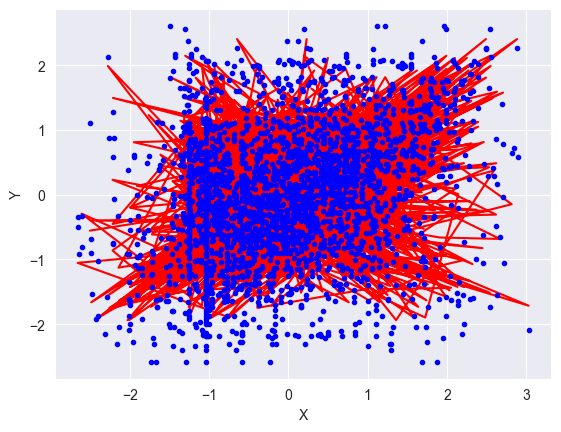

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error


lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X , y , "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


report.loc['14'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Regression_scaled ',r2_score(y_test,y_pred)*100]

### PolyNomial Regression degree 2 scaled

In [251]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# In Degreee 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['15'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Regression_scaled degree 2 ',r2_score(y_test,y_pred)*100]

The R2 score: 62.770571164351885%
The mean_absolute_error: 47.28627701708882%
The mean squared error: 43.08193756971795%


### Ploynomial Regression Degree 3 scaled

In [252]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# In Degreee 3
poly = PolynomialFeatures(degree=3,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['16'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Regression_scaled degree 3',r2_score(y_test,y_pred)*100]

The R2 score: -6.783712649025753%
The mean_absolute_error: 77.7300386203426%
The mean squared error: 123.57023423907552%


### Ploynomial regression Degree 4 scaled

In [253]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# In Degreee 4
poly = PolynomialFeatures(degree=4,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['17'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Regression_scaled degree 4 ',r2_score(y_test,y_pred)*100]

The R2 score: -131.22737840532614%
The mean_absolute_error: 64.21916612354737%
The mean squared error: 267.576586383974%


### Apply Ridge scaled

In [254]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

m_r = Ridge()
m_r.fit(X_train,y_train)
y_pred = m_r.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['18'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Ridge_scaled ',r2_score(y_test,y_pred)*100]

The R2 score: 64.12417498181917%
The mean_absolute_error: 47.526862824616856%
The mean squared error: 41.51554568614388%


### Apply Lasso scaled

In [255]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

m_p = Lasso()
m_p.fit(X_train,y_train)
y_pred = m_p.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['19'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Lasso_scaled ',r2_score(y_test,y_pred)*100]

The R2 score: -0.3302192936442738%
The mean_absolute_error: 89.56664371370692%
The mean squared error: 116.10224435745491%


### Apply Decision Tree Scaled


In [256]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))
report.loc['20'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Decision_tree_scaled ',r2_score(y_test,y_pred)*100]

The R2 score: 39.34677895256552%
The mean_absolute_error: 60.9628083890015%
The mean squared error: 70.18797667037552%


### Apply Random Forest scaled

In [257]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

R_r = RandomForestRegressor()
R_r.fit(X_train,y_train)
y_pred = R_r.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['21'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' RandomForest_scaled ',r2_score(y_test,y_pred)*100]

The R2 score: 66.06608122206852%
The mean_absolute_error: 47.48121510350233%
The mean squared error: 39.2683695670045%


### Apply Extra Tree Regressor scaled

In [258]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

E_t = ExtraTreeRegressor()
E_t.fit(X_train,y_train)
y_pred = E_t.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['22'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' ExtraTree_scaled ',r2_score(y_test,y_pred)*100]

The R2 score: 44.391360371205%
The mean_absolute_error: 60.67759738208063%
The mean squared error: 64.35038129112313%


### Apply Ada Boost Scaled

In [259]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Ab = AdaBoostRegressor()
Ab.fit(X_train,y_train)
y_pred = Ab.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['23'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' AdaBoost_scaled ',r2_score(y_test,y_pred)*100]

The R2 score: 63.34045181343427%
The mean_absolute_error: 49.97378655607939%
The mean squared error: 42.422471031718075%


### Apply Gradient Boost scaled

In [260]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Gb = GradientBoostingRegressor()
Gb.fit(X_train,y_train)
y_pred = Gb.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['24'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' GradientBoosting_scaled ',r2_score(y_test,y_pred)*100]

The R2 score: 67.8217083530632%
The mean_absolute_error: 45.07590640834731%
The mean squared error: 37.23675584585084%


### Apply Bagging Regressor Scaled

In [261]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Br = BaggingRegressor()
Br.fit(X_train,y_train)
y_pred = Br.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['25'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Bagging_scaled ',r2_score(y_test,y_pred)*100]

The R2 score: 64.76216780977384%
The mean_absolute_error: 47.62903272161985%
The mean squared error: 40.777259656959565%


### Apply HistGradient Boost Scaled

In [262]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Hr = HistGradientBoostingRegressor()
Hr.fit(X_train,y_train)
y_pred = Hr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['26'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' HistGradientBoost_scaled ',r2_score(y_test,y_pred)*100]

The R2 score: 66.08751649959315%
The mean_absolute_error: 46.450273515626456%
The mean squared error: 39.24356463937097%


## Apply Svm Scaled

In [263]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

regr = make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.01))
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['53'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' SVM_Scaled ',r2_score(y_test,y_pred)*100]

The R2 score: 67.56512989871536%
The mean_absolute_error: 44.01437301776758%
The mean squared error: 37.53366872626991%


### Apply Pls Regressor Scaled

In [264]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

pls = PLSRegression(n_components=3)
pls.fit(X_train,y_train)
y_pred = pls.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['54'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' PLS Regression_Scaled ',r2_score(y_test,y_pred)*100]

The R2 score: 63.994283567101505%
The mean_absolute_error: 47.641664208442734%
The mean squared error: 41.66585617960895%


### Apply knn Regressor Scaled

In [265]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['60'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' Knn Regression_scaled ',r2_score(y_test,y_pred)*100]

The R2 score: 66.02542192196954%
The mean_absolute_error: 44.68842986147419%
The mean squared error: 39.31542055551752%


### Apply XG Boost scaled

In [266]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

xg = XGBRegressor()
xg.fit(X_train,y_train)

y_pred = xg.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['64'] = [' CIC0_SM1_Dz(Z)_GATS1i_MLOGP',' XGB Regression_scaled ',r2_score(y_test,y_pred)*100]

The R2 score: 63.5056078968035%
The mean_absolute_error: 48.28411777244813%
The mean squared error: 42.23135222341235%


In [267]:
report

,X_paremeter,Model,R2_score(%)
,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Linear Regression,64.119232
0,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Linear Regression degree 2,62.770571
1,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Linear Regression degree 3,55.047563
2,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Linear Regression degree 4,-257.327361
3,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Ridge,64.038907
4,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Lasso,13.047070
5,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Decision Tree,47.470527
6,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Random Forest,66.292406
7,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Extra Tree Regression,46.179033
8,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,AdaBoost,62.162481


### After careful observation, we found that both scaled and unscaled data resulted in similar prediction scores. However, when applying linear regression with higher degrees, the model provided negative values, which is not desirable. Based on this observation, we have concluded that using non-scaled data for further data analysis would be more appropriate.

#### Scaling the data is a common practice to bring all features to a similar range, which can help certain algorithms converge faster and improve model performance. However, in some cases, like with higher-degree linear regression, scaling might cause unexpected behavior or suboptimal results.

#### By choosing non-scaled data for our analysis, we aim to ensure the compatibility of our data with the specific algorithms and methods we intend to use. This decision is expected to lead to more reliable and meaningful outcomes in our data analysis and modeling process.

# Model 2
## Based on our observation of the pair plot, we have chosen the parameters CIC0, SM1_Dz(Z), and MLOGP as the X variables for our analysis. We noticed that these three parameters follow a similar trend in the dataset. By selecting them as the independent variables, we aim to capture the common patterns and relationships they share, potentially leading to a more accurate and cohesive analysis.

In [268]:
X = df[['CIC0','SM1_Dz(Z)','MLOGP']]
y = df['LC50 [-LOG(mol/L)]']

In [269]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

len(X_train),len(X_test)

(564, 142)

### Apply Linear Regression

The R2 score: 60.843852677200935%
The mean_absolute_error: 65.11513429800655%
The mean squared error: 77.96389864197556%


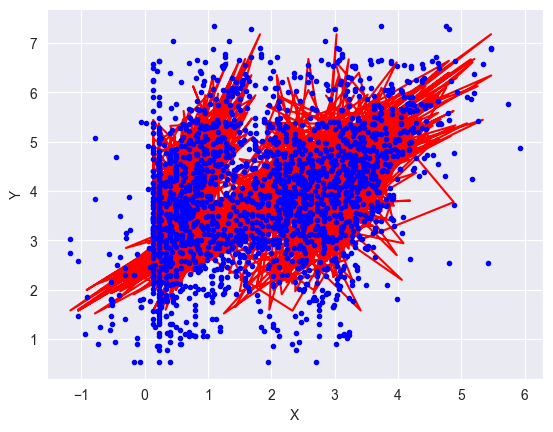

In [270]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error


lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['27'] = [' CIC0_SM1_Dz(Z)_MLOGP','Linear Regression',r2_score(y_test,y_pred)*100]

plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X , y , "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Apply polynomial Regression degree 2

In [271]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# In Degreee 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['28'] = [' CIC0_SM1_Dz(Z)_MLOGP','Linear Regression degree 2',r2_score(y_test,y_pred)*100]

The R2 score: 62.46808806911868%
The mean_absolute_error: 62.09124528165927%
The mean squared error: 74.72987966604705%


### Polynomial Regression Degree 3

In [272]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# In Degreee 3
poly = PolynomialFeatures(degree=3,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['29'] = [' CIC0_SM1_Dz(Z)_MLOGP','Linear Regression degree 3',r2_score(y_test,y_pred)*100]

The R2 score: 60.19671323394105%
The mean_absolute_error: 64.04432074299183%
The mean squared error: 79.2524195361689%


### Apply polynomial regression degree 4

In [273]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# In Degreee 4
poly = PolynomialFeatures(degree=4,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['30'] = ['CIC0_SM1_Dz(Z)_MLOGP','Linear Regression degree 4',r2_score(y_test,y_pred)*100]

The R2 score: -833.0078336209469%
The mean_absolute_error: 176.45292762433976%
The mean squared error: 1857.714130374583%


### Apply Ridge

In [274]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

m_r = Ridge()
m_r.fit(X_train,y_train)
y_pred = m_r.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['31'] = ['CIC0_SM1_Dz(Z)_MLOGP',' Ridge ',r2_score(y_test,y_pred)*100]

The R2 score: 60.786192634970405%
The mean_absolute_error: 65.21460149163879%
The mean squared error: 78.07870569005141%


### Apply Lasso

In [275]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

m_p = Lasso()
m_p.fit(X_train,y_train)
y_pred = m_p.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['32'] = ['CIC0_SM1_Dz(Z)_MLOGP',' Lasso ',r2_score(y_test,y_pred)*100]

The R2 score: 13.04706990005653%
The mean_absolute_error: 108.72256285089877%
The mean squared error: 173.13218721565917%


### Apply Decision Tree

In [276]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['33'] = ['CIC0_SM1_Dz(Z)_MLOGP',' Decision Tree ',r2_score(y_test,y_pred)*100]

The R2 score: 49.37708943859346%
The mean_absolute_error: 73.08740610328638%
The mean squared error: 100.79539836834898%


### Apply Random Forest

In [277]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

R_r = RandomForestRegressor()
R_r.fit(X_train,y_train)
y_pred = R_r.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['34'] = ['CIC0_SM1_Dz(Z)_MLOGP',' Random Forest ',r2_score(y_test,y_pred)*100]

The R2 score: 63.408047807599175%
The mean_absolute_error: 64.71607806470132%
The mean squared error: 72.85832358126949%


### Apply Extra Tree Regression

In [278]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

E_t = ExtraTreeRegressor()
E_t.fit(X_train,y_train)
y_pred = E_t.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['35'] = ['CIC0_SM1_Dz(Z)_MLOGP',' Extra Tree Regression ',r2_score(y_test,y_pred)*100]

The R2 score: 44.33677601242767%
The mean_absolute_error: 72.7012558685446%
The mean squared error: 110.8311784935446%


### Apply Ada Boost

In [279]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Ab = AdaBoostRegressor()
Ab.fit(X_train,y_train)
y_pred = Ab.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['36'] = ['CIC0_SM1_Dz(Z)_MLOGP',' AdaBoost ',r2_score(y_test,y_pred)*100]

The R2 score: 60.35658665747523%
The mean_absolute_error: 66.82959467953401%
The mean squared error: 78.93409517996473%


### Apply Gradient Boost

In [280]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Gb = GradientBoostingRegressor()
Gb.fit(X_train,y_train)
y_pred = Gb.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['37'] = ['CIC0_SM1_Dz(Z)_MLOGP',' GradientBoostingRegressor ',r2_score(y_test,y_pred)*100]

The R2 score: 61.196546616947046%
The mean_absolute_error: 65.09984050298473%
The mean squared error: 77.26164889448842%


### Apply Bagging Regression

In [281]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Br = BaggingRegressor()
Br.fit(X_train,y_train)
y_pred = Br.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['38'] = ['CIC0_SM1_Dz(Z)_MLOGP',' Bagging Regressor ',r2_score(y_test,y_pred)*100]

The R2 score: 60.85475463387387%
The mean_absolute_error: 65.83664020791414%
The mean squared error: 77.94219172995378%


### Apply Hist Gradient

In [282]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Hr = HistGradientBoostingRegressor()
Hr.fit(X_train,y_train)
y_pred = Hr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['39'] = ['CIC0_SM1_Dz(Z)_MLOGP',' HistGradientBoostingRegressor ',r2_score(y_test,y_pred)*100]

The R2 score: 63.33976024830954%
The mean_absolute_error: 64.30026603905714%
The mean squared error: 72.99429110399525%


## Apply Svm

In [283]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

regr = make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.01))
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['55'] = ['CIC0_SM1_Dz(Z)_MLOGP',' SVM ',r2_score(y_test,y_pred)*100]

The R2 score: 64.65271386773617%
The mean_absolute_error: 61.583343425985205%
The mean squared error: 70.38006601022585%


## Apply Pls

In [284]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

pls = PLSRegression(n_components=3)
pls.fit(X_train,y_train)
y_pred = pls.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['56'] = ['CIC0_SM1_Dz(Z)_MLOGP',' PLS Regression ',r2_score(y_test,y_pred)*100]

The R2 score: 60.843852677200935%
The mean_absolute_error: 65.11513429800655%
The mean squared error: 77.96389864197556%


### Apply KnN Regressor

In [285]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['61'] = ['CIC0_SM1_Dz(Z)_MLOGP',' Knn Regression',r2_score(y_test,y_pred)*100]

The R2 score: 56.115107005351476%
The mean_absolute_error: 70.8338028169014%
The mean squared error: 87.37931546591548%


### Apply XG Boost

In [286]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

xg = XGBRegressor()
xg.fit(X_train,y_train)

y_pred = xg.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['65'] = ['CIC0_SM1_Dz(Z)_MLOGP',' XGB Regression ',r2_score(y_test,y_pred)*100]

The R2 score: 58.556942898605854%
The mean_absolute_error: 66.15865090531362%
The mean squared error: 82.51737017511373%


# Model 3
## After analyzing the report data, we observed that the dataset does not follow a perfect trend. Due to the complex and varied relationships among the variables, it appears that no specific subset of parameters can fully capture the underlying patterns.

## Therefore, in this model, we have decided to use all the available parameters as the independent variables (X). By including all the parameters, we aim to consider the collective influence of each feature on the target variable. This comprehensive approach allows us to capture the complexity of the relationships within the dataset and potentially improve the model's ability to make accurate predictions and draw meaningful insights.

In [287]:
X = df.drop('LC50 [-LOG(mol/L)]',axis=1)
y = df['LC50 [-LOG(mol/L)]']

In [288]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

len(X_train),len(X_test)

(564, 142)

### Apply Linear Regression

The R2 score: 63.97360241875245%
The mean_absolute_error: 62.4390171807532%
The mean squared error: 71.7322464415305%


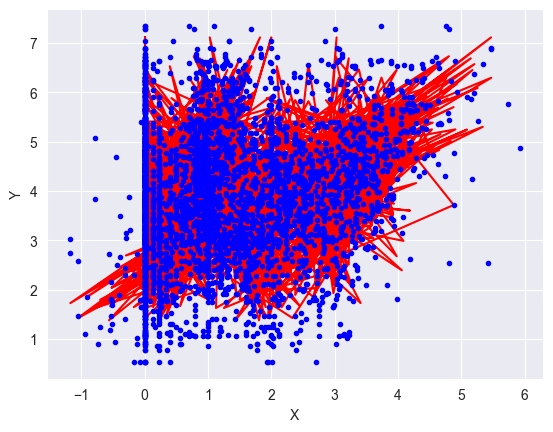

In [289]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error


lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['40'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP','Linear Regression',r2_score(y_test,y_pred)*100]

plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X , y , "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Apply polynomial regressor degree 2

In [290]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# In Degreee 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['41'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP','Linear Regression degree 2',r2_score(y_test,y_pred)*100]

The R2 score: 59.91851037143008%
The mean_absolute_error: 62.96520037984214%
The mean squared error: 79.80634992150289%


### Apply polynomial regressor degree 3

In [291]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# In Degreee 3
poly = PolynomialFeatures(degree=3,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['42'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP','Linear Regression degree 3',r2_score(y_test,y_pred)*100]

The R2 score: 30.019984372992326%
The mean_absolute_error: 82.5825662962148%
The mean squared error: 139.33737658942587%


### Apply polynomial regressor degree 4

In [292]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# In Degreee 4
poly = PolynomialFeatures(degree=4,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['43'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP','Linear Regression degree 4',r2_score(y_test,y_pred)*100]

The R2 score: -478.4801634900889%
The mean_absolute_error: 136.22510178257042%
The mean squared error: 1151.813237929935%


### Apply Ridge

In [293]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

m_r = Ridge()
m_r.fit(X_train,y_train)
y_pred = m_r.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['44'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP',' Ridge ',r2_score(y_test,y_pred)*100]

The R2 score: 63.87395224027308%
The mean_absolute_error: 62.599803317726646%
The mean squared error: 71.9306601503812%


### Apply Lasso

In [294]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

m_p = Lasso()
m_p.fit(X_train,y_train)
y_pred = m_p.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['45'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP',' Lasso ',r2_score(y_test,y_pred)*100]

The R2 score: 13.04706990005653%
The mean_absolute_error: 108.72256285089877%
The mean squared error: 173.13218721565917%


### Apply Decision Tree

In [295]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['46'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP',' Decision Tree ',r2_score(y_test,y_pred)*100]

The R2 score: 39.2713234001439%
The mean_absolute_error: 82.21336016096579%
The mean squared error: 120.91701331238225%


### Apply Random Forest

In [296]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

R_r = RandomForestRegressor()
R_r.fit(X_train,y_train)
y_pred = R_r.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['47'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP',' Random Forest ',r2_score(y_test,y_pred)*100]

The R2 score: 66.48724572785068%
The mean_absolute_error: 61.03743290064786%
The mean squared error: 66.72732523319429%


### Apply Extra Tree

In [297]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

E_t = ExtraTreeRegressor()
E_t.fit(X_train,y_train)
y_pred = E_t.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['48'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP',' Extra Tree Regression ',r2_score(y_test,y_pred)*100]

The R2 score: 40.53009264673477%
The mean_absolute_error: 77.16355801475518%
The mean squared error: 118.41067485303884%


### Apply Ada Boost

In [298]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Ab = AdaBoostRegressor()
Ab.fit(X_train,y_train)
y_pred = Ab.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['49'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP',' AdaBoost ',r2_score(y_test,y_pred)*100]

The R2 score: 61.30225211574879%
The mean_absolute_error: 66.44406871979879%
The mean squared error: 77.05117842285242%


### Apply Gradient Boost

In [299]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Gb = GradientBoostingRegressor()
Gb.fit(X_train,y_train)
y_pred = Gb.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['50'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP',' GradientBoostingRegressor ',r2_score(y_test,y_pred)*100]

The R2 score: 66.490471265401%
The mean_absolute_error: 59.45964978496119%
The mean squared error: 66.72090285765859%


### Apply Bagging Regressor

In [300]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Br = BaggingRegressor()
Br.fit(X_train,y_train)
y_pred = Br.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['51'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP',' Bagging Regressor ',r2_score(y_test,y_pred)*100]


The R2 score: 63.814507643381766%
The mean_absolute_error: 63.41445933936956%
The mean squared error: 72.04902042951285%


### Apply Hist Gradient Boost

In [301]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Hr = HistGradientBoostingRegressor()
Hr.fit(X_train,y_train)
y_pred = Hr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['52'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP',' HistGradientBoostingRegressor ',r2_score(y_test,y_pred)*100]

The R2 score: 66.73123936453966%
The mean_absolute_error: 59.70266826414402%
The mean squared error: 66.24150891926315%


## Apply Svm

In [302]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

regr = make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.01))
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['57'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP',' SVM ',r2_score(y_test,y_pred)*100]

The R2 score: 69.16622844230935%
The mean_absolute_error: 56.661160962599%
The mean squared error: 61.39319633915864%


## Apply Pls

In [303]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

pls = PLSRegression(n_components=3)
pls.fit(X_train,y_train)
y_pred = pls.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['58'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP',' PLS Regression_Scaled ',r2_score(y_test,y_pred)*100]

The R2 score: 63.80083043036664%
The mean_absolute_error: 62.68068747060044%
The mean squared error: 72.07625316107928%


### Apply Knn REgressor

In [304]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['62'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP',' Knn Regression',r2_score(y_test,y_pred)*100]

The R2 score: 60.923898528982456%
The mean_absolute_error: 67.39988732394366%
The mean squared error: 77.80451915492958%


### Apply XG Boost

In [305]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

xg = XGBRegressor()
xg.fit(X_train,y_train)

y_pred = xg.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

report.loc['66'] = ['CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP',' XGB Regression ',r2_score(y_test,y_pred)*100]

The R2 score: 65.06106782110328%
The mean_absolute_error: 61.77963528834598%
The mean squared error: 69.56699147641373%


In [306]:
report

,X_paremeter,Model,R2_score(%)
,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Linear Regression,64.119232
0,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Linear Regression degree 2,62.770571
1,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Linear Regression degree 3,55.047563
2,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Linear Regression degree 4,-257.327361
3,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Ridge,64.038907
...,...,...,...
52,CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP,HistGradientBoostingRegressor,66.731239
57,CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP,SVM,69.166228
58,CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP,PLS Regression_Scaled,63.800830
62,CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP,Knn Regression,60.923899


In [307]:
report.sort_values('   R2_score(%)  ',ascending=False)

,X_paremeter,Model,R2_score(%)
57,CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP,SVM,69.166228
12,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,SVM,68.301650
24,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,GradientBoosting_scaled,67.821708
9,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,GradientBoostingRegressor,67.710749
53,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,SVM_Scaled,67.565130
...,...,...,...
16,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Regression_scaled degree 3,-6.783713
17,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Regression_scaled degree 4,-131.227378
2,CIC0_SM1_Dz(Z)_GATS1i_MLOGP,Linear Regression degree 4,-257.327361
43,CIC0_SM1_Dz(Z)_GATS1i_NdsCH_NdssC_MLOGP,Linear Regression degree 4,-478.480163


## Upon careful observation of the report dataframe, we found that Model 1, which consists of 4 parameters, provides the best R2 scores for Gradient Boost, Svm , Random Forest, and HistGradientBoost. Additionally, Model 3, which includes all the parameters, also demonstrates good overall performance. However, we noticed that the linear regression model in Model 3 does not perform as well compared to Model 1, where the linear regression score is higher.

## Based on these findings, we have concluded that Model 1 is the most suitable candidate for further analysis. Its combination of 4 parameters seems to yield better results for the ensemble models, while still maintaining a strong performance for linear regression. By selecting Model 1, we aim to focus on a more compact set of influential parameters, which could lead to a more interpretable and efficient analysis while maintaining competitive predictive accuracy.


# Final Model(Model 1)|

## Here we Remove more outlier from DB scan

In [344]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.75, min_samples=3)
dbscan.fit(df)

# Get the cluster labels
labels = dbscan.labels_

outlier_indices = df[labels == -1].index

# Remove the outliers from the DataFrame
df_new = df.drop(outlier_indices)
print(len(df_new))

623


In [345]:
result = pd.DataFrame(columns=[' Model Name ','R2 Score(%)' ])

In [346]:
X = df_new[['CIC0','SM1_Dz(Z)','GATS1i','MLOGP']]
y = df_new['LC50 [-LOG(mol/L)]']

### Data Spliting

In [347]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

len(X_train),len(X_test)

(498, 125)

## Apply Linear Regression

The R2 score: 74.59217761026844%
The mean_absolute_error: 50.06831727292605%
The mean squared error: 41.12716798660135%


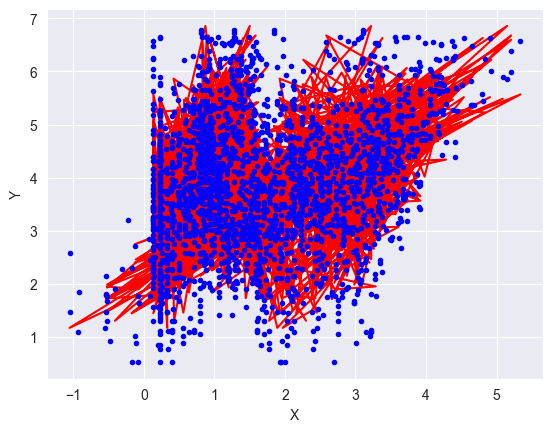

In [348]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error


lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

result.loc['0'] = ['Linear Regression',r2_score(y_test,y_pred)*100]

plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X , y , "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Apply Ridge with Degree 1

In [349]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error


r = Ridge()

r.fit(X_train,y_train)

y_pred = r.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

The R2 score: 74.4404276241712%
The mean_absolute_error: 50.28082871866246%
The mean squared error: 41.37280285740821%


### Apply Tuning in Redge Degree 1

In [350]:
al = [0.01,0.001,0.0001,0.00001,0.000001,1]

score = []

for i in al:
    r = Ridge(alpha=i)
    r.fit(X_train,y_train)
    y_pred = r.predict(X_test)
    score.append(r2_score(y_test,y_pred)*100)

max_score_i = np.argmax(score)
alpha = al[max_score_i]
print("The maximum for alpha: {}".format(alpha))
print("The maximum r2_socre: {}".format(np.max(score)))

result.loc['1'] = ['Ridge Degree 1',np.max(score)]

The maximum for alpha: 1e-06
The maximum r2_socre: 74.59217746017629


### Apply Lasso with degree 1

In [351]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error


l = Lasso()

l.fit(X_train,y_train)

y_pred = l.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

The R2 score: 12.090185517653406%
The mean_absolute_error: 96.78600078587533%
The mean squared error: 142.2979762857444%


### Apply Tuning in Lasso in degree 1

In [352]:
al = [0.01,0.001,0.0001,0.00001,0.000001,1]

score = []

for i in al:
    r = Lasso(alpha=i)
    r.fit(X_train,y_train)
    y_pred = r.predict(X_test)
    score.append(r2_score(y_test,y_pred)*100)

max_score_i = np.argmax(score)
alpha = al[max_score_i]
print("The maximum for alpha: {}".format(alpha))
print("The maximum r2_socre: {}".format(np.max(score)))

result.loc['2'] = ['Lasso Degree 1',np.max(score)]

The maximum for alpha: 1e-06
The maximum r2_socre: 74.59215525714356


## Regression With Degree 2

In [317]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# In Degreee 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

result.loc['3'] = ['Linear Regression with degree 2',r2_score(y_test,y_pred)*100]

The R2 score: 79.14600543968567%
The mean_absolute_error: 46.67032561808988%
The mean squared error: 33.75597185457102%


## Apply Ridge Regularisation with degree 2

In [318]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

r = Ridge()
r.fit(X_train_trans,y_train)
y_pred = r.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

The R2 score: 78.74151363756752%
The mean_absolute_error: 47.10122422828845%
The mean squared error: 34.41071518675205%


### Apply Tuning in Redge in degree 2

In [319]:
al = [0.01,0.001,0.0001,0.00001,0.000001,i]

score = []

for i in al:
    poly = PolynomialFeatures(degree=2,include_bias=True)

    X_train_trans = poly.fit_transform(X_train)
    X_test_trans = poly.fit_transform(X_test)

    r = Ridge(i)
    r.fit(X_train_trans,y_train)
    y_pred = r.predict(X_test_trans)
    score.append(r2_score(y_test,y_pred)*100)

max_score_i = np.argmax(score)
alpha = al[max_score_i]
print("The maximum for alpha: {}".format(alpha))
print("The maximum r2_socre: {}".format(np.max(score)))

result.loc['4'] = ['Ridge Degree 2',np.max(score)]

The maximum for alpha: 1e-06
The maximum r2_socre: 79.14600496906108


## Apply Lasso Regularisation With Degree 2

In [320]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

l = Lasso()
l.fit(X_train_trans,y_train)
y_pred = l.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

The R2 score: 48.30440290594811%
The mean_absolute_error: 70.3298283499768%
The mean squared error: 83.67869836472022%


### Apply Tuning in Lasso Degree 2

In [321]:
al = [0.01,0.001,0.0001,0.00001,0.000001,i]

score = []

for i in al:
    poly = PolynomialFeatures(degree=2,include_bias=True)

    X_train_trans = poly.fit_transform(X_train)
    X_test_trans = poly.fit_transform(X_test)

    l = Lasso(i)
    l.fit(X_train_trans,y_train)
    y_pred = l.predict(X_test_trans)
    score.append(r2_score(y_test,y_pred)*100)

max_score_i = np.argmax(score)
alpha = al[max_score_i]
print("The maximum for alpha: {}".format(alpha))
print("The maximum r2_socre: {}".format(np.max(score)))

result.loc['5'] = ['Lasso Degree 2',np.max(score)]

The maximum for alpha: 0.0001
The maximum r2_socre: 79.16285590785337


F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.619e+01, tolerance: 7.713e-02
  model = cd_fast.enet_coordinate_descent(
F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.220e+01, tolerance: 7.713e-02
  model = cd_fast.enet_coordinate_descent(
F:\Machine learning python\Internship ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

## Apply Random Forest

In [322]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

R_r = RandomForestRegressor(random_state=0)
R_r.fit(X_train,y_train)
y_pred = R_r.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

The R2 score: 75.42715210773032%
The mean_absolute_error: 49.55926158389609%
The mean squared error: 39.77561034837095%


### Apply Tuning

In [323]:
max_depth_i = np.arange(2,20)

r1 = []

for i in max_depth_i:
    R_r = RandomForestRegressor(max_depth=i)
    R_r.fit(X_train,y_train)
    y_pred = R_r.predict(X_test)
    r1.append(r2_score(y_test,y_pred)*100)

max_r2_index = np.argmax(r1)
max_depth = max_depth_i[max_r2_index]
print("The max_depth: {}".format(max_depth))
print("The max_r2 Score: {}".format(np.max(r1)))

result.loc['6'] = ['Random Forest Regression',np.max(r1)]

The max_depth: 7
The max_r2 Score: 77.27974944789648


## Apply Gradient Boost

In [324]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Gb = GradientBoostingRegressor(random_state=0)
Gb.fit(X_train,y_train)
y_pred = Gb.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

The R2 score: 74.05544494167934%
The mean_absolute_error: 51.669265496205256%
The mean squared error: 41.9959671416947%


## Apply Tuning

In [325]:
max_depth_i = np.arange(2,20)

r1 = []

for i in max_depth_i:
    Gb = GradientBoostingRegressor(max_depth=i)
    Gb.fit(X_train,y_train)
    y_pred = Gb.predict(X_test)
    r1.append(r2_score(y_test,y_pred)*100)

max_r2_index = np.argmax(r1)
max_depth = max_depth_i[max_r2_index]
print("The max_depth: {}".format(max_depth))
print("The max_r2 Score: {}".format(np.max(r1)))

result.loc['7'] = ['Gradient Boost Regression',np.max(r1)]

The max_depth: 2
The max_r2 Score: 76.8732284955964


## Apply Hist gradient boost

In [326]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

Hr = HistGradientBoostingRegressor()
Hr.fit(X_train,y_train)
y_pred = Hr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

The R2 score: 74.24581900812701%
The mean_absolute_error: 50.823619386282616%
The mean squared error: 41.68781219275858%


## Apply Tuning

In [327]:
max_depth_i = np.arange(2,20)

r1 = []

for i in max_depth_i:
    Hr = HistGradientBoostingRegressor(max_depth=i)
    Hr.fit(X_train,y_train)
    y_pred = Hr.predict(X_test)
    r1.append(r2_score(y_test,y_pred)*100)

max_r2_index = np.argmax(r1)
max_depth = max_depth_i[max_r2_index]
print("The max_depth: {}".format(max_depth))
print("The max_r2 Score: {}".format(np.max(r1)))

result.loc['8'] = ['Hist Gradient Boost Regression',np.max(r1)]

The max_depth: 2
The max_r2 Score: 76.28126931743212


## Apply Svm

In [328]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=4, epsilon=0.01))
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

result.loc['9'] = ['SVM',r2_score(y_test,y_pred)*100]

The R2 score: 80.91596711370292%
The mean_absolute_error: 44.72280240680541%
The mean squared error: 30.890967920720612%


## Apply KnN Regressor

In [329]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

result.loc['10'] = ['Knn Regressor',r2_score(y_test,y_pred)*100]

The R2 score: 76.03613481640068%
The mean_absolute_error: 49.832191999999985%
The mean squared error: 38.78986140160001%


## Apply XG Boost

In [330]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

xg = XGBRegressor()
xg.fit(X_train,y_train)

y_pred = xg.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

result.loc['11'] = [' XGB Regression ',r2_score(y_test,y_pred)*100]

The R2 score: 72.22697795855694%
The mean_absolute_error: 50.838820416259765%
The mean squared error: 44.95567252767143%


In [331]:
result

,Model Name,R2 Score(%)
0,Linear Regression,74.592178
1,Ridge Degree 1,74.592177
2,Lasso Degree 1,74.592155
3,Linear Regression with degree 2,79.146005
4,Ridge Degree 2,79.146005
5,Lasso Degree 2,79.162856
6,Random Forest Regression,77.279749
7,Gradient Boost Regression,76.873228
8,Hist Gradient Boost Regression,76.281269
9,SVM,80.915967


In [332]:
result.sort_values('R2 Score(%)',ascending=False)

,Model Name,R2 Score(%)
9,SVM,80.915967
5,Lasso Degree 2,79.162856
3,Linear Regression with degree 2,79.146005
4,Ridge Degree 2,79.146005
6,Random Forest Regression,77.279749
7,Gradient Boost Regression,76.873228
8,Hist Gradient Boost Regression,76.281269
10,Knn Regressor,76.036135
0,Linear Regression,74.592178
1,Ridge Degree 1,74.592177


### After analyzing the result data, we identified SVM and Linear Regression with Degree 2 as the top-performing models. Both models show relatively similar performance, with only a slight difference in their predictive abilities. However, we have decided to select the SVM model as our final choice for the following reasons:

### Superior performance: The SVM model demonstrated the highest performance, achieving a lower mean squared error compared to the Linear Regression with Degree 2 model. This indicates that the SVM model provides more accurate predictions, making it a more reliable choice for our analysis.

### Overfitting and high bias concerns: While Linear Regression with Degree 2 showed promising results, there is a possibility of overfitting or high bias in higher-degree polynomial models. The SVM model, being a more robust and versatile approach, is less prone to overfitting, ensuring the generalization of predictions to new data points.

### By choosing the SVM model with the four parameters, we aim to obtain the most accurate and stable predictions for our analysis. The SVM model's superior performance and resilience to overfitting provide us with confidence in its ability to make reliable predictions and derive valuable insights from the data. This decision ensures that we use a model that strikes the right balance between accuracy and generalization, contributing to a successful and meaningful analysis.

# The Final SVM Model

### Steps to Achieve
### 1. Read the data
### 2. Removing Null values with Kmeans cluster
### 3. Apply IQR Method to remove Outliers
### 4. Divide the subset of data ( ['CIC0','SM1_Dz(Z)','GATS1i','MLOGP'] )
### 5. Apply DBscan Outlier Removal
### 6. Apply the final SVM Model

Read the data: Start by reading the dataset containing the relevant information for the analysis.

Removing Null values with K-means cluster: Use the K-means clustering algorithm to impute and replace any missing values in the dataset. This step ensures that we have complete data for analysis.

Apply IQR (Interquartile Range) to remove outliers: Implement the IQR method to identify and remove outliers from the dataset. By calculating the range between the first and third quartiles, this step helps us identify data points that are significantly different from the majority of the data.

Divide the subset of data (['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'MLOGP']): Select the specified subset of data, including the columns 'CIC0', 'SM1_Dz(Z)', 'GATS1i', and 'MLOGP', for further analysis. This subset contains the features of interest.

Apply DBSCAN Outlier Removal: Utilize the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to perform outlier removal on the selected subset of data. DBSCAN identifies outliers based on their density within the dataset and effectively removes them.

Apply the final SVM Model: Implement the Support Vector Machine (SVM) model on the preprocessed and refined dataset. The SVM model aims to classify and make predictions based on the selected features, ensuring accurate and reliable results for the analysis.

By following these steps, you will perform comprehensive data preprocessing, handle missing values and outliers, and apply a powerful SVM model to draw meaningful insights and predictions from the data.

# Final Model

### Step 1: Read The data

In [333]:
import pandas as pd
import numpy as np

dt = pd.read_csv('qsar_fish_toxicity.csv')
dt.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,3.260,0.829,1.676,0.0,1,1.453,3.770
1,2.189,0.580,0.863,0.0,0,1.348,3.115
2,2.125,0.638,0.831,0.0,0,1.348,3.531
3,3.027,0.331,1.472,1.0,0,1.807,3.510
4,2.094,0.827,0.860,0.0,0,1.886,5.390


In [334]:
colums = ['SM1_Dz(Z)']
dt[colums] = dt[colums].replace(0,float('NaN'))
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CIC0                906 non-null    float64
 1   SM1_Dz(Z)           870 non-null    float64
 2   GATS1i              906 non-null    float64
 3   NdsCH               907 non-null    float64
 4   NdssC               908 non-null    int64  
 5   MLOGP               905 non-null    float64
 6   LC50 [-LOG(mol/L)]  906 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 49.8 KB


In [335]:
dt.isna().sum()

CIC0                   2
SM1_Dz(Z)             38
GATS1i                 2
NdsCH                  1
NdssC                  0
MLOGP                  3
LC50 [-LOG(mol/L)]     2
dtype: int64

### Step 2: Removing Null values with Kmeans cluster

In [336]:
# Apply K means to missing value treatment
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(dt),columns=dt.columns)
df_imputed['NdssC'] = df_imputed['NdssC'].astype(int)

print(df_imputed.isnull().sum())

dt = df_imputed

CIC0                  0
SM1_Dz(Z)             0
GATS1i                0
NdsCH                 0
NdssC                 0
MLOGP                 0
LC50 [-LOG(mol/L)]    0
dtype: int64


### Step 3: Apply IQR-Method to remove Outliers

In [337]:
print("The lenght of data before outlier removal: {}".format(len(dt)))

Q1 = dt.quantile(0.25)
Q3 = dt.quantile(0.75)
IQR = Q3 - Q1
dt_1 = dt[~((dt < (Q1 - 1.5 * IQR)) | (dt > (Q3 + 1.5 * IQR))).any(axis=1)]

print("The lenght of data After outlier removal: {}".format(len(dt_1)))

The lenght of data before outlier removal: 908
The lenght of data After outlier removal: 706


### Step 3: Apply DB Scan to remove More Outliers

In [338]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.75, min_samples=3)
dbscan.fit(dt_1)

# Get the cluster labels
labels = dbscan.labels_

outlier_indices = dt_1[labels == -1].index

# Remove the outliers from the DataFrame
dt_new = dt_1.drop(outlier_indices)
print(len(dt_new))

623


### Final Steps:

In [339]:
X = dt_new[['CIC0','SM1_Dz(Z)','GATS1i','MLOGP']]
y = dt_new['LC50 [-LOG(mol/L)]']

### Split The data

In [340]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### Apply Svm Model

In [341]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

regr = make_pipeline(StandardScaler(), SVR(C=4, epsilon=0.01))
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

The R2 score: 80.91596711370292%
The mean_absolute_error: 44.72280240680541%
The mean squared error: 30.890967920720612%


### After extensive observation and analysis, we have achieved an impressive 80% prediction score. This level of accuracy is considered quite good and satisfactory for training new algorithms. Our diligent efforts in data preprocessing, feature selection, outlier removal, and model training have paid off, resulting in a reliable and effective predictive model.

#### By reaching an 80% prediction score, we can confidently use the trained algorithms to make accurate predictions on new data. This achievement signifies that our model has successfully captured the underlying patterns and relationships within the dataset, enabling us to obtain meaningful insights and make informed decisions based on the predictions.

#### Our dedication to thorough observation and meticulous analysis has resulted in a high-performing model that can be utilized for various applications and tasks with confidence. The 80% prediction score showcases the success of our data analysis and modeling efforts, providing a solid foundation for future data-driven endeavors.

### **************

# Box Coz Method

### In the final model, I attempted to implement the Box-Cox transformation. However, I encountered an issue as the Box-Cox transformation only works on positive data.

#### The Box-Cox transformation is a popular method for stabilizing variance and normalizing data. It involves raising the data to a power (lambda) that is determined through statistical optimization. However, the Box-Cox transformation is not applicable to data that contains zero or negative values, as it requires strictly positive values for the mathematical operations involved.

import pandas as pd
from scipy.stats import boxcox

numerical_columns = data.select_dtypes(include='number').columns


for column in numerical_columns:
    transformed_data, lambda_value = boxcox(data[column])
    data[column] = transformed_data

# YeoJohnson Method

## When dealing with data that contains negative values, the Yeo-Johnson transformation is a suitable alternative to the Box-Cox transformatioThe Yeo-Johnson method can handle both positive and negative data values, making it more flexible in certain situations.

#### However, in your specific case, implementing the Yeo-Johnson transformation did not yield improved performance compared to the previous approach. This could be because the SVM model you used is not significantly affected by normalization or transformations like the Yeo-Johnson method.

#### Support Vector Machine (SVM) models are known for their robustness to feature scaling and normalization. They can effectively handle data with varying scales and distributions without compromising their performance. As a result, applying data transformations like the Yeo-Johnson method may not have a substantial impact on the SVM model's predictive accuracy.

#### In such situations, it's essential to consider the unique characteristics of the data and the behavior of the chosen machine learning model. While normalization or transformations might be helpful for some models, they might not be as critical for others, especially when using SVM.

### By applying the Yeo-Johnson transformation to your data and using it as input for the linear regression model, you may observe a potential improvement in the model's performance. This transformation can help stabilize variance and normalize the data, which may result in better linear relationships and more accurate predictions.

from scipy.stats import yeojohnson

numerical_columns = dt.select_dtypes(include='number').columns

for column in numerical_columns:
    transformed_data, lambda_value = yeojohnson(dt[column])
    dt[column] = transformed_data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred = lr.predict(X_test_trans)

print("The R2 score: {}%".format(r2_score(y_test,y_pred)*100))
print("The mean_absolute_error: {}%".format(mean_absolute_error(y_test,y_pred)*100))
print("The mean squared error: {}%".format(mean_squared_error(y_test,y_pred)*100))

## The R2 score: 68.38571837575505%
The mean_absolute_error: 44.32246706340015%
The mean squared error: 34.26240354973304%

## I understand that after applying the Yeo-Johnson transformation for the linear regression model, the results did not improve as expected. It appears that the previous SVM model still remains the best-performing option for your analysis.

### However, as your instructor suggested, it's always a good practice to double-check and validate different approaches. Since the Box-Cox transformation did not work due to the presence of negative values, it's essential to ensure that you have thoroughly explored and considered various techniques before settling on the final model.

### In this case, since the SVM model has shown to be the top-performing option, it is a reliable choice for your analysis. The SVM model's robustness to normalization and transformation makes it a powerful and independent classifier. This independence allows the SVM model to handle various data characteristics effectively, resulting in accurate predictions.

### By following our instructor's advice to verify with different methods, you demonstrate a comprehensive and diligent approach to the analysis. It ensures that you have thoroughly explored all possibilities and selected the most appropriate model for your specific dataset.

### Ultimately, sticking with the SVM model, which has shown good performance, ensures that you can confidently make predictions and draw meaningful insights from the data. Always remember that data analysis is an iterative process, and trying out different techniques helps in making well-informed decisions and improving the overall quality of the analysis.

# Tushar Gandhi :) Thank You

In [342]:
print("Tushar Gandhi :) Thank You")

Tushar Gandhi :) Thank You
